In [1]:
# Usual imports
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18, 10)
import seaborn as sns
sns.set()
import tensorflow as tf

# OpenCV
import cv2

We start by loading all the data saved after milestone 2.1

In [3]:
data = np.load('Part_3.1.npz')

#Put everything into different variables
train_X = data['train_X']
valid_X = data['valid_X']
train_Y = data['train_Y']
valid_Y = data['valid_Y']
pred_base = data['pred_base']
valid_X_pgd = data['valid_X_pgd']
pred_pgd = data['pred_pgd']
valid_X_bim = data['valid_X_bim']
pred_bim = data['pred_bim']
valid_X_cw = data['valid_X_cw']
pred_cw = data['pred_cw']

We define some constant that will be used for each method

In [5]:
NUM_SAMPLES = 100
NUM_SAMPLES_C_AND_W = 8
EPSILON = 0.08

Let's start with the unprocessed images

(-0.5, 54.5, 54.5, -0.5)

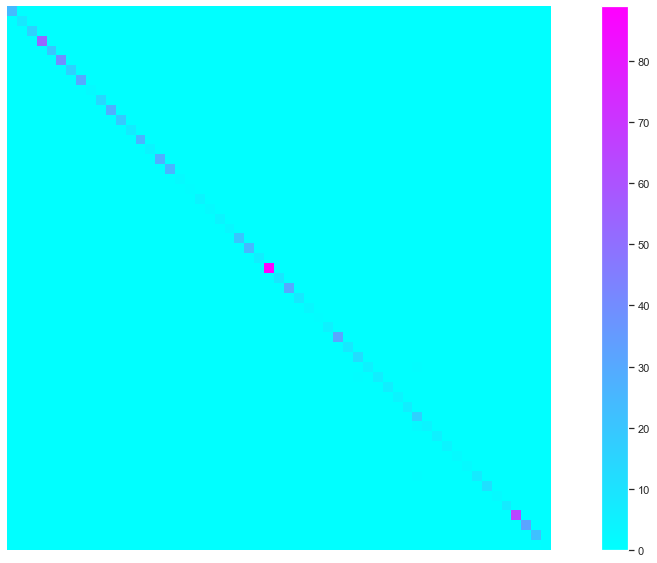

In [6]:
cm_base = confusion_matrix(valid_Y.argmax(axis=1), pred_base.argmax(axis=1))
fig, axes = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_base)
disp.plot(ax=axes, cmap = 'cool', include_values=False)
axes.axis('off')

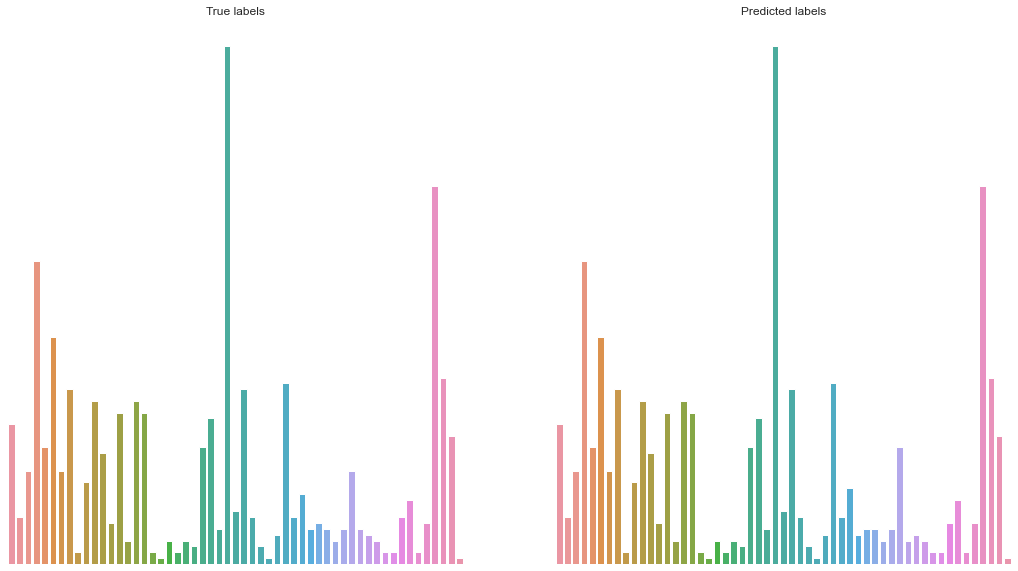

In [7]:
df_base = pd.DataFrame({'Valid_data':valid_Y.argmax(axis=1), 'Predictions':pred_base.argmax(axis=1)})
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Valid_data',data=df_base, ax=axes[0])
axes[0].set_title('True labels')
axes[0].axis('off')

sns.countplot(x='Predictions',data=df_base, ax=axes[1])
axes[1].set_title('Predicted labels')
axes[1].axis('off')

plt.show()

Now we plot the same things, but using the images modified using PGD method

(-0.5, 41.5, 41.5, -0.5)

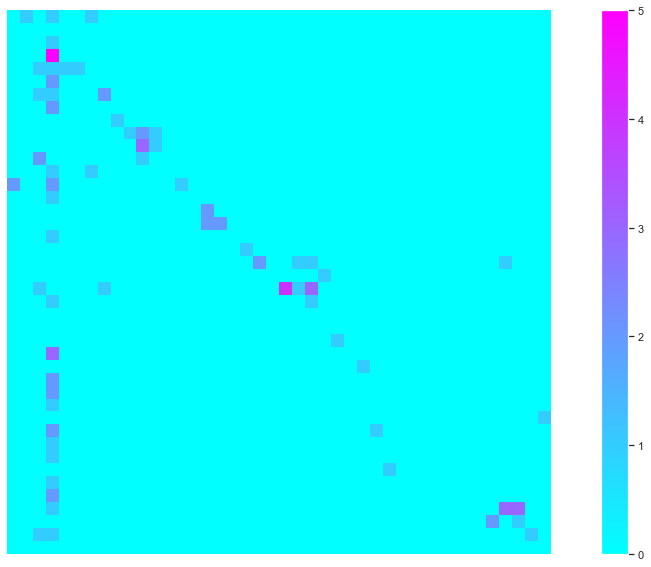

In [8]:
cm_pgd = confusion_matrix(valid_Y[:NUM_SAMPLES].argmax(axis=1), pred_pgd.argmax(axis=1))
fig, axes = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pgd)
disp.plot(ax=axes, cmap = 'cool', include_values=False)
axes.axis('off')

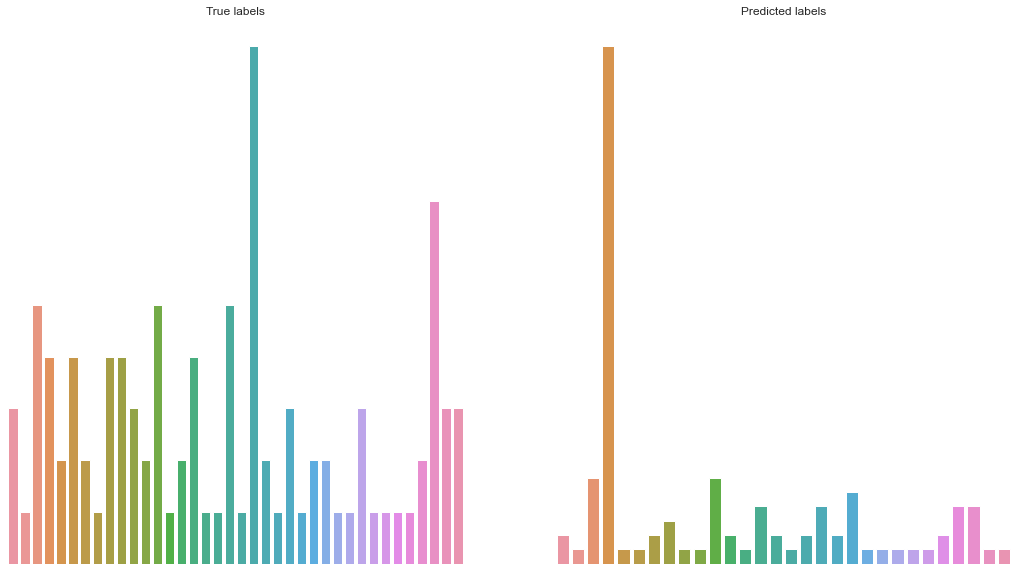

In [10]:
df_pgd = pd.DataFrame({'Valid_data':valid_Y[:NUM_SAMPLES].argmax(axis=1), 'Predictions':pred_pgd.argmax(axis=1)})
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Valid_data',data=df_pgd, ax=axes[0])
axes[0].set_title('True labels')
axes[0].axis('off')

sns.countplot(x='Predictions',data=df_pgd, ax=axes[1])
axes[1].set_title('Predicted labels')
axes[1].axis('off')

plt.show()

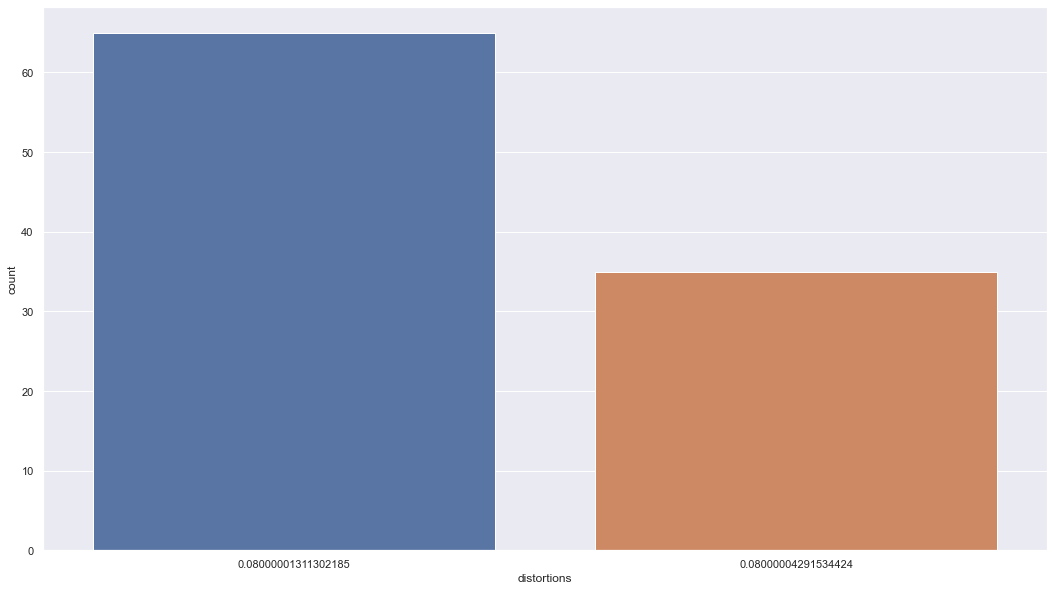

In [12]:
diff_pgd = valid_X[:NUM_SAMPLES] - valid_X_pgd
distortions = [tf.norm(diff_pgd[i,:],ord=np.inf).numpy() for i in range(diff_pgd.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions', data=df)
plt.show()

Now we do the same, but for the images modified through the BIM algorithm

(-0.5, 41.5, 41.5, -0.5)

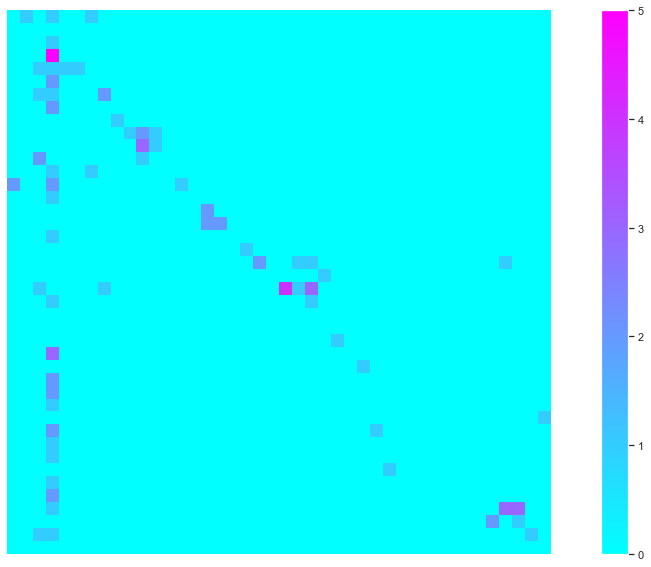

In [13]:
cm_bim= confusion_matrix(valid_Y[:NUM_SAMPLES].argmax(axis=1), pred_bim.argmax(axis=1))
fig, axes = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bim)
disp.plot(ax=axes, cmap = 'cool', include_values=False)
axes.axis('off')

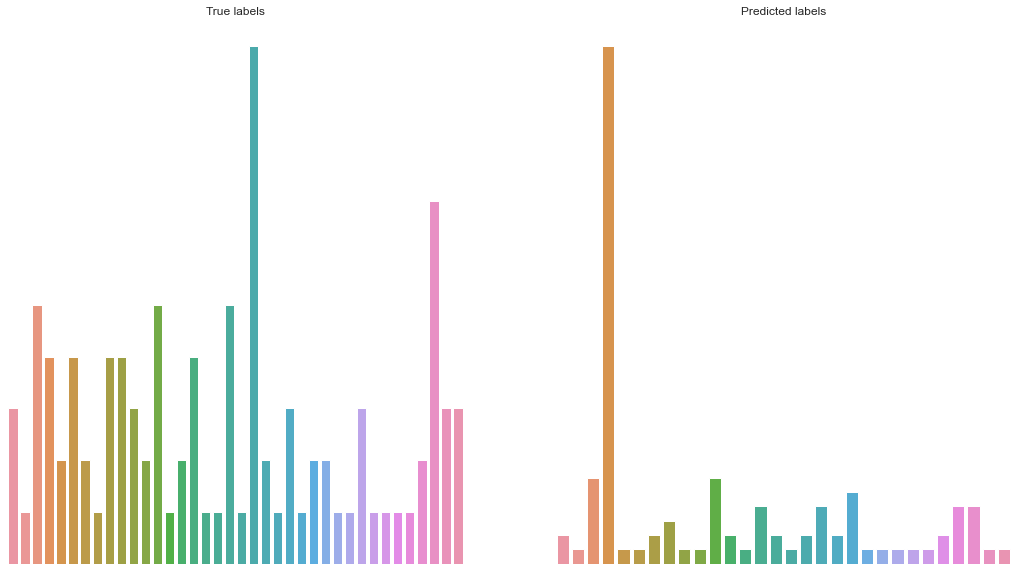

In [14]:
df_bim = pd.DataFrame({'Valid_data':valid_Y[:NUM_SAMPLES].argmax(axis=1), 'Predictions':pred_bim.argmax(axis=1)})
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Valid_data',data=df_bim, ax=axes[0])
axes[0].set_title('True labels')
axes[0].axis('off')

sns.countplot(x='Predictions',data=df_bim, ax=axes[1])
axes[1].set_title('Predicted labels')
axes[1].axis('off')

plt.show()

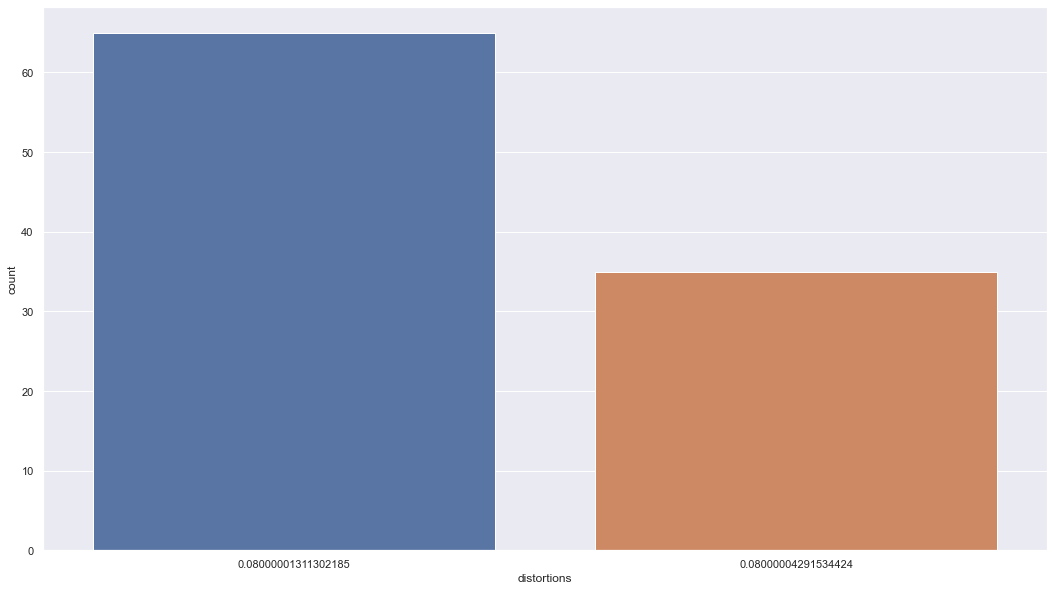

In [18]:
diff_bim = valid_X[:NUM_SAMPLES] - valid_X_bim
distortions = [tf.norm(diff_bim[i,:],ord=np.inf).numpy() for i in range(diff_bim.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions', data=df)
plt.show()

And finally, for the C&W attack (only 8 samples here)

(-0.5, 8.5, 8.5, -0.5)

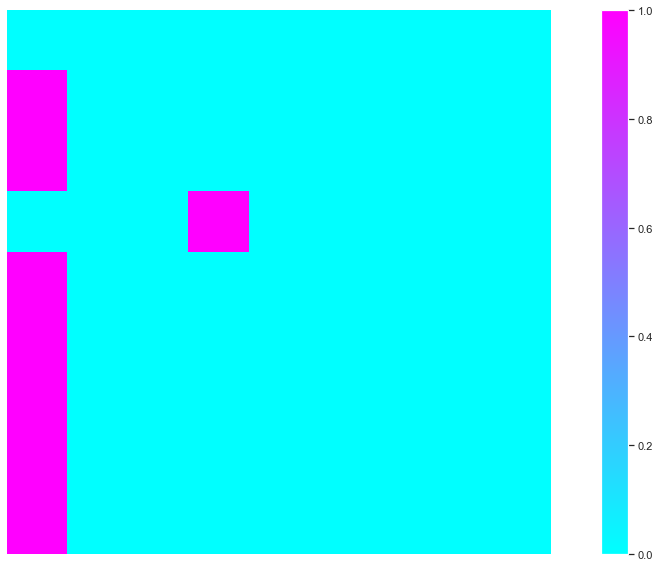

In [16]:
cm_cw= confusion_matrix(valid_Y[:NUM_SAMPLES_C_AND_W].argmax(axis=1), pred_cw.argmax(axis=1))
fig, axes = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cw)
disp.plot(ax=axes, cmap = 'cool', include_values=False)
axes.axis('off')

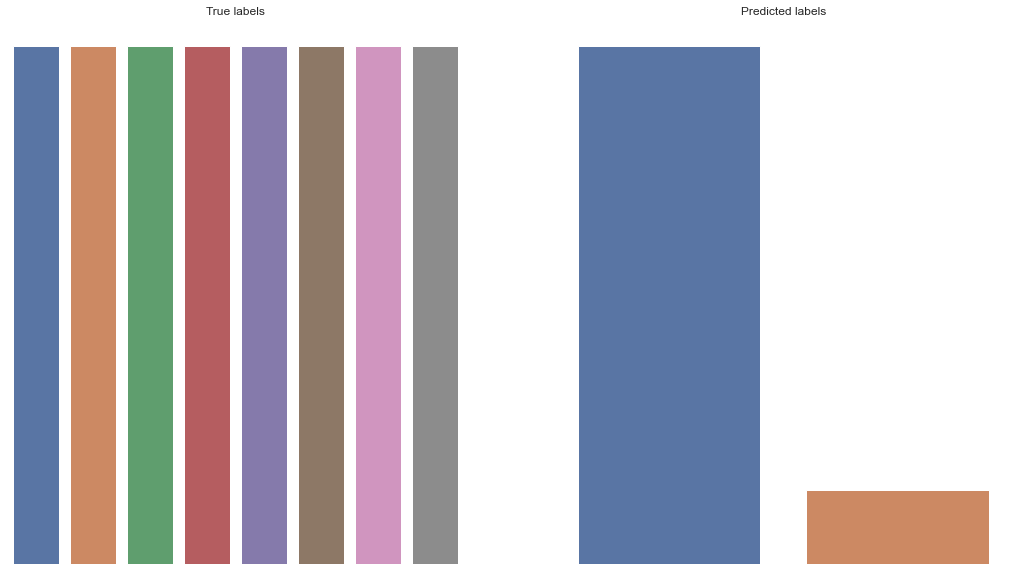

In [17]:
df_cw = pd.DataFrame({'Valid_data':valid_Y[:NUM_SAMPLES_C_AND_W].argmax(axis=1), 'Predictions':pred_cw.argmax(axis=1)})
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Valid_data',data=df_cw, ax=axes[0])
axes[0].set_title('True labels')
axes[0].axis('off')

sns.countplot(x='Predictions',data=df_cw, ax=axes[1])
axes[1].set_title('Predicted labels')
axes[1].axis('off')

plt.show()

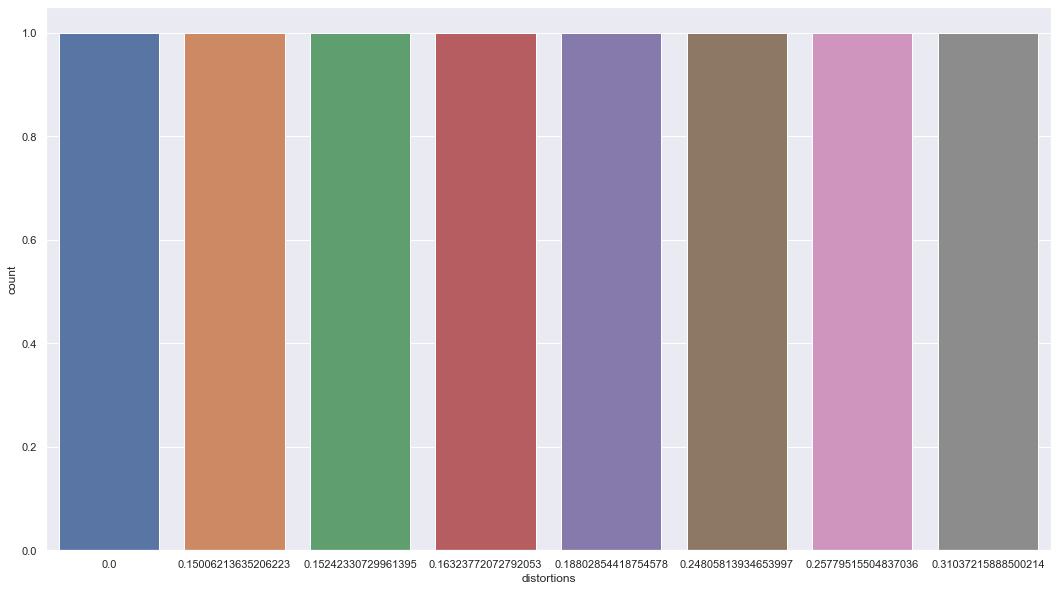

In [19]:
diff_cw = valid_X[:NUM_SAMPLES_C_AND_W] - valid_X_cw
distortions = [tf.norm(diff_cw[i,:],ord=np.inf).numpy() for i in range(diff_cw.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions', data=df)
plt.show()